# Text Classification

# A First Look at Hugging Face Datasets

In [1]:
from datasets import list_datasets
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} data sets currently available on Hugging Face")
print(f"The first of ten are:{all_datasets[:10]}")

There are 137494 data sets currently available on Hugging Face
The first of ten are:['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [2]:
from datasets import load_dataset

emotions = load_dataset("emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/LENOVO/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
emotions #look inside the emotion object

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
# Access the value of key 'train'
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
# Query the length 
len(train_ds)

16000

In [6]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [7]:
import pandas as pd
pd.DataFrame(train_ds[:5])

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [8]:
train_ds.column_names

['text', 'label']

In [9]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


# From Datasets to DataFrame

In [10]:
# set_format() allows us to change the output format of the Dataset. 
# It does not change the underlying data format and we can switch to another format later

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# Looking at the Class Distribution

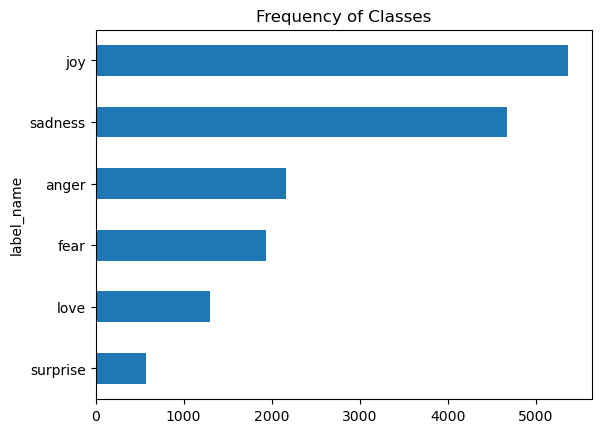

In [12]:
import matplotlib.pyplot as plt

    df["label_name"].value_counts(ascending = True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

# From Text to Tokens

# Character Tokeniztion

In [13]:
text = "Tokenization is a core task of NLP."
tokenized_text = list(text)
print(len(tokenized_text))
print(tokenized_text)

35
['T', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [14]:
token2idx = {ch: idx for idx,ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'i': 10, 'k': 11, 'n': 12, 'o': 13, 'r': 14, 's': 15, 't': 16, 'z': 17}


In [15]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 13, 11, 8, 12, 10, 17, 6, 16, 10, 13, 12, 0, 10, 15, 0, 6, 0, 7, 13, 14, 8, 0, 16, 6, 15, 11, 0, 13, 9, 0, 3, 2, 4, 1]


In [16]:
import torch 
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids,num_classes = len(token2idx))
one_hot_encodings.shape

# Hàm torch.tensor() được sử dụng để tạo một tensor mới. Tensor trong PyTorch
# tương tự như mảng đa chiều trong NumPy nhưng có thể được sử dụng trên
# GPU để tăng tốc độ tính toán.

# Hàm one_hot() được sử dụng để biến đổi một tensor chứa các chỉ số
# thành một biểu diễn one-hot.

torch.Size([35, 18])

In [17]:
# Kiểm tra vector thứ nhất
print(f"Token :{tokenized_text[0]}")
print(f"tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token :T
tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


# Word Tokenization

In [18]:
# Example:
text = "Tokenizing text is a core task of NLP."
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


# Subword Tokenization

In [19]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# from transformers import DistilBertTokenizer
# distil_bert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [20]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [21]:
token = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(token)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [22]:
print(tokenizer.convert_tokens_to_string(token))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [23]:
tokenizer.vocab_size

30522

In [24]:
tokenizer.model_max_length

512

In [25]:
# Another interesting attribute to know about is the names of the fields that the model 
# expects in its forward pass:
tokenizer.model_input_names

['input_ids', 'attention_mask']

# Tokenizing the Whole Dataset

In [26]:
def tokenize(batch):
    return tokenizer(batch["text"],padding = True,truncation =True)

In [27]:
emotions.reset_format()
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [28]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [29]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Loading cached processed dataset at C:\Users\LENOVO\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-b4245f74839e794e.arrow
Loading cached processed dataset at C:\Users\LENOVO\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-d47b57812efeedb4.arrow
Loading cached processed dataset at C:\Users\LENOVO\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-6c3cf07167669631.arrow


In [30]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


# Fine-Tuning Model

##  Loading a pretrained model

In [31]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
device = "cuda" if torch.cuda.is_available() else "cpu"

model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

D:\Jupyter\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
D:\Jupyter\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Defining the performance metrics

In [32]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

# Training the model

In [33]:
from huggingface_hub import notebook_login

notebook_login()
     

In [34]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"])
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True, 
                                  log_level="error")

In [35]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

D:\Jupyter\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.311660,0.906500,0.905517
2,No log,0.215584,0.923000,0.922565


In [39]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [44]:
preds_output.metrics

{'test_loss': 0.21558432281017303,
 'test_accuracy': 0.923,
 'test_f1': 0.9225647553629688,
 'test_runtime': 60.3627,
 'test_samples_per_second': 33.133,
 'test_steps_per_second': 0.53}

In [46]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix

y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, y_valid, labels)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (D:\Jupyter\Lib\site-packages\sklearn\metrics\__init__.py)

In [47]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), 
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns   
    return {"loss": loss.cpu().numpy(), 
            "predicted_label": pred_label.cpu().numpy()}
     

In [48]:
emotions_encoded.set_format("torch", 
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [49]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [50]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,5.712728
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.665506
465,i would eventually go in to these stores but i...,joy,fear,5.127327
1274,i am going to several holiday parties and i ca...,joy,sadness,5.094818
765,i feel super awkward and out of place right now,joy,sadness,4.941143
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.808383
1801,i feel that he was being overshadowed by the s...,love,sadness,4.792139
1509,i guess this is a memoir so it feels like that...,joy,fear,4.708754
882,i feel badly about reneging on my commitment t...,love,sadness,4.707018
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.451698


In [51]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
571,i realize that i sound a little overdramatic w...,sadness,sadness,0.015984
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.015985
133,i and feel quite ungrateful for it but i m loo...,sadness,sadness,0.016216
1152,i feel pathetic because i shouldn t complain a...,sadness,sadness,0.016271
244,im kinda relieve but at the same time i feel d...,sadness,sadness,0.016300
866,i feel quite jaded and unenthusiastic about li...,sadness,sadness,0.016313
69,i have no extra money im worried all of the ti...,sadness,sadness,0.016393
189,i leave the meeting feeling more than a little...,sadness,sadness,0.016403
1452,i always feel guilty and come to one conclusio...,sadness,sadness,0.016452
1368,i started this blog with pure intentions i mus...,sadness,sadness,0.016456


In [52]:
trainer.push_to_hub(commit_message="Training completed!")

'https://huggingface.co/VuaCoBac/distilbert-base-uncased-finetuned-emotion/tree/main/'

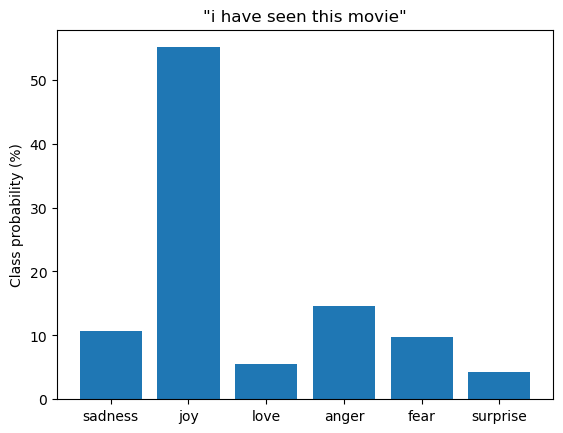

In [69]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)
custom_tweet = "i have seen this movie"
preds = classifier(custom_tweet, return_all_scores=True)
preds_df = pd.DataFrame(preds[0])
labels = preds_df['label'].tolist()  # Lấy labels từ DataFrame
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()
